In [29]:
#Name : Manahil Sarwar
#Section : AI-K
#Roll No: 21I-0293

In [30]:
#Importing Libraries
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

In [31]:
#Data Loading and Augmentation
class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, file) for file in os.listdir(root_dir) if file.endswith(('jpg', 'jpeg', 'png'))]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Open and ensure the image is in RGB mode
        if self.transform:
            image = self.transform(image)
        return image

transform=transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15), 
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0)),
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

#Dataset directory
dataset_dir=r"C:\Users\HP\Downloads\signatures_directory"
dataset=ImageDataset(root_dir=dataset_dir,transform=transform)
dataloader=DataLoader(dataset,batch_size=32,shuffle=True,num_workers=0)

### Part 1: Variational Autoencoder (VAE) to generate fake signatures.

In [32]:
#VAE Model
class VAE(nn.Module):
    def __init__(self,input_dim=64*64,latent_dim=2,hidden_dim=400):
        super(VAE,self).__init__()
        #Encoder
        self.fc1=nn.Linear(input_dim,hidden_dim)
        self.fc_mu=nn.Linear(hidden_dim,latent_dim)
        self.fc_logvar=nn.Linear(hidden_dim,latent_dim)  
        #Decoder
        self.fc3=nn.Linear(latent_dim,hidden_dim)
        self.fc4=nn.Linear(hidden_dim,input_dim)
    def encode(self,x):
        h1=F.relu(self.fc1(x))
        mu=self.fc_mu(h1)
        logvar=self.fc_logvar(h1)
        return mu,logvar
    def reparameterize(self,mu,logvar):
        std=torch.exp(0.5*logvar)
        eps=torch.randn_like(std)
        return mu+eps*std
    def decode(self,z):
        h3=F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))
    def forward(self,x):
        mu,logvar=self.encode(x)
        z=self.reparameterize(mu,logvar)
        return self.decode(z),mu,logvar

In [33]:
#Training the VAE
vae=VAE(input_dim=64*64,latent_dim=2,hidden_dim=400)
optimizer=optim.Adam(vae.parameters(),lr=1e-3)

#Train the VAE
vae.train()
for epoch in range(150):
    train_loss=0
    for batch_idx,data in enumerate(tqdm(dataloader)):
        data=data.view(-1,4096) 
        data=(data+1)/2
        optimizer.zero_grad()
        recon_batch,mu,logvar=vae(data)
        BCE=F.binary_cross_entropy(recon_batch,data,reduction='sum') 
        KLD=-0.5*torch.sum(1+logvar-mu.pow(2)-logvar.exp())
        loss=KLD+BCE
        loss.backward()
        train_loss+=loss.item()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {train_loss / len(dataloader.dataset)}')

#Save the model
model_dir=r"C:\Users\HP\Downloads\outputQ1"
os.makedirs(model_dir,exist_ok=True) 
model_save_path = os.path.join(model_dir, 'vae_model.pth')
torch.save({
    'model_state_dict':vae.state_dict(),
    'optimizer_state_dict':optimizer.state_dict(),
},model_save_path)
print(f'Model and optimizer state saved to {model_save_path}')

  0%|          | 0/18 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:49<00:00,  2.77s/it]


Epoch 1, Loss: 8129.06590902587


100%|██████████| 18/18 [00:52<00:00,  2.91s/it]


Epoch 2, Loss: 7970.161461910486


100%|██████████| 18/18 [00:53<00:00,  2.96s/it]


Epoch 3, Loss: 7866.751600775527


100%|██████████| 18/18 [00:52<00:00,  2.90s/it]


Epoch 4, Loss: 7756.022264194139


100%|██████████| 18/18 [00:52<00:00,  2.92s/it]


Epoch 5, Loss: 7744.929590916896


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 6, Loss: 7673.840330242674


100%|██████████| 18/18 [00:51<00:00,  2.88s/it]


Epoch 7, Loss: 7631.066141540751


100%|██████████| 18/18 [00:51<00:00,  2.87s/it]


Epoch 8, Loss: 7695.632311698718


100%|██████████| 18/18 [00:51<00:00,  2.85s/it]


Epoch 9, Loss: 7672.865545587225


100%|██████████| 18/18 [00:52<00:00,  2.89s/it]


Epoch 10, Loss: 7596.524240570628


100%|██████████| 18/18 [00:51<00:00,  2.87s/it]


Epoch 11, Loss: 7754.580222999656


100%|██████████| 18/18 [00:52<00:00,  2.89s/it]


Epoch 12, Loss: 7674.326601133242


100%|██████████| 18/18 [00:52<00:00,  2.92s/it]


Epoch 13, Loss: 7644.24068688473


100%|██████████| 18/18 [00:53<00:00,  2.97s/it]


Epoch 14, Loss: 7628.250112680288


100%|██████████| 18/18 [00:52<00:00,  2.93s/it]


Epoch 15, Loss: 7587.510109031594


100%|██████████| 18/18 [00:52<00:00,  2.92s/it]


Epoch 16, Loss: 7606.755244104854


100%|██████████| 18/18 [00:52<00:00,  2.92s/it]


Epoch 17, Loss: 7596.599612952152


100%|██████████| 18/18 [00:52<00:00,  2.93s/it]


Epoch 18, Loss: 7594.773049379007


100%|██████████| 18/18 [00:52<00:00,  2.93s/it]


Epoch 19, Loss: 7567.05576243418


100%|██████████| 18/18 [00:54<00:00,  3.00s/it]


Epoch 20, Loss: 7540.165353851878


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 21, Loss: 7590.719964443109


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 22, Loss: 7631.899347885188


100%|██████████| 18/18 [00:55<00:00,  3.07s/it]


Epoch 23, Loss: 7607.139229910715


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 24, Loss: 7494.89937829098


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 25, Loss: 7571.156216017056


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 26, Loss: 7537.924219823146


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 27, Loss: 7552.836014408768


100%|██████████| 18/18 [00:54<00:00,  3.05s/it]


Epoch 28, Loss: 7528.025612408425


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 29, Loss: 7455.81500400641


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 30, Loss: 7524.177235362294


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 31, Loss: 7558.805030906594


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 32, Loss: 7475.060482486264


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 33, Loss: 7509.228091732486


100%|██████████| 18/18 [00:55<00:00,  3.10s/it]


Epoch 34, Loss: 7475.7357504149495


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 35, Loss: 7519.369383871337


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 36, Loss: 7510.734945555746


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 37, Loss: 7485.5584560296475


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 38, Loss: 7544.735805860806


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 39, Loss: 7521.8955310639885


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 40, Loss: 7532.886899396177


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 41, Loss: 7505.2027923248625


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 42, Loss: 7511.118183736836


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 43, Loss: 7516.366831573375


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 44, Loss: 7519.634472298535


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 45, Loss: 7546.438022264194


100%|██████████| 18/18 [00:53<00:00,  2.97s/it]


Epoch 46, Loss: 7520.022688086653


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 47, Loss: 7540.774886246566


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 48, Loss: 7534.924920944941


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 49, Loss: 7507.817887190934


100%|██████████| 18/18 [00:55<00:00,  3.07s/it]


Epoch 50, Loss: 7482.401138249771


100%|██████████| 18/18 [01:05<00:00,  3.64s/it]


Epoch 51, Loss: 7508.779334435096


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 52, Loss: 7428.974287431319


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 53, Loss: 7462.865944439675


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 54, Loss: 7537.2399821857825


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 55, Loss: 7488.508867759844


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 56, Loss: 7450.131657079899


100%|██████████| 18/18 [00:53<00:00,  2.97s/it]


Epoch 57, Loss: 7499.526338570284


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 58, Loss: 7514.382683722528


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 59, Loss: 7480.466646634615


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 60, Loss: 7500.145854796246


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 61, Loss: 7528.554683922848


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 62, Loss: 7442.427891769688


100%|██████████| 18/18 [00:54<00:00,  3.00s/it]


Epoch 63, Loss: 7528.478200835622


100%|██████████| 18/18 [00:53<00:00,  2.96s/it]


Epoch 64, Loss: 7631.149728851878


100%|██████████| 18/18 [00:53<00:00,  2.97s/it]


Epoch 65, Loss: 7555.421871422848


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 66, Loss: 7550.260504306891


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 67, Loss: 7484.544515868246


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 68, Loss: 7492.7676013764885


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 69, Loss: 7458.699687356914


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 70, Loss: 7472.319981613438


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 71, Loss: 7497.148417825664


100%|██████████| 18/18 [00:53<00:00,  2.97s/it]


Epoch 72, Loss: 7469.062212039263


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 73, Loss: 7537.726764609089


100%|██████████| 18/18 [00:54<00:00,  3.00s/it]


Epoch 74, Loss: 7490.73423191392


100%|██████████| 18/18 [00:53<00:00,  2.97s/it]


Epoch 75, Loss: 7480.977392399267


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 76, Loss: 7476.639068938874


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 77, Loss: 7494.242638221154


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 78, Loss: 7505.222529261104


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 79, Loss: 7496.153372181204


100%|██████████| 18/18 [00:56<00:00,  3.13s/it]


Epoch 80, Loss: 7484.282743460966


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 81, Loss: 7506.4534093835855


100%|██████████| 18/18 [00:53<00:00,  2.97s/it]


Epoch 82, Loss: 7472.344005766369


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 83, Loss: 7483.023811312385


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 84, Loss: 7511.67672204098


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 85, Loss: 7536.228478064904


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 86, Loss: 7504.710542224702


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 87, Loss: 7439.621809180403


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 88, Loss: 7470.92598693624


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 89, Loss: 7490.6828049879805


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 90, Loss: 7490.4287556519


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 91, Loss: 7458.548153831845


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 92, Loss: 7602.47977478251


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 93, Loss: 7544.71707947001


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 94, Loss: 7485.42674886962


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 95, Loss: 7470.69868575435


100%|██████████| 18/18 [00:53<00:00,  2.97s/it]


Epoch 96, Loss: 7506.513947315705


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 97, Loss: 7418.517274067079


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 98, Loss: 7533.987063229739


100%|██████████| 18/18 [00:54<00:00,  3.00s/it]


Epoch 99, Loss: 7515.750720796131


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 100, Loss: 7507.119022578983


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 101, Loss: 7502.871047247024


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 102, Loss: 7512.01271319826


100%|██████████| 18/18 [00:53<00:00,  2.98s/it]


Epoch 103, Loss: 7484.8718181232825


100%|██████████| 18/18 [00:54<00:00,  3.05s/it]


Epoch 104, Loss: 7503.353685539721


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 105, Loss: 7511.737691019917


100%|██████████| 18/18 [00:55<00:00,  3.07s/it]


Epoch 106, Loss: 7455.177256825206


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 107, Loss: 7525.017379593063


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 108, Loss: 7461.344177469666


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 109, Loss: 7471.901079226763


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 110, Loss: 7469.5523355225505


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 111, Loss: 7491.83113517342


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 112, Loss: 7490.822417653961


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 113, Loss: 7502.466571514423


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 114, Loss: 7508.866865556319


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 115, Loss: 7499.086229037889


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 116, Loss: 7498.406763321314


100%|██████████| 18/18 [00:54<00:00,  3.00s/it]


Epoch 117, Loss: 7484.982894059066


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 118, Loss: 7487.422214829441


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 119, Loss: 7496.036862551511


100%|██████████| 18/18 [00:53<00:00,  2.99s/it]


Epoch 120, Loss: 7498.107468377976


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 121, Loss: 7477.541258871337


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 122, Loss: 7487.822889838027


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 123, Loss: 7483.084120306777


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 124, Loss: 7460.2200431404535


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 125, Loss: 7440.61564217033


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 126, Loss: 7523.980018028846


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 127, Loss: 7486.547797905219


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 128, Loss: 7500.834181118361


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 129, Loss: 7470.5104095123625


100%|██████████| 18/18 [00:54<00:00,  3.00s/it]


Epoch 130, Loss: 7462.316989325778


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 131, Loss: 7487.212566892743


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 132, Loss: 7490.779266469208


100%|██████████| 18/18 [00:55<00:00,  3.06s/it]


Epoch 133, Loss: 7447.227959377862


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 134, Loss: 7464.682341746795


100%|██████████| 18/18 [00:53<00:00,  3.00s/it]


Epoch 135, Loss: 7482.544206444597


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 136, Loss: 7472.541892027243


100%|██████████| 18/18 [00:54<00:00,  3.00s/it]


Epoch 137, Loss: 7485.200025397779


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 138, Loss: 7456.686246208219


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 139, Loss: 7492.405436197917


100%|██████████| 18/18 [00:54<00:00,  3.00s/it]


Epoch 140, Loss: 7473.064338656135


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 141, Loss: 7494.168092161744


100%|██████████| 18/18 [00:54<00:00,  3.04s/it]


Epoch 142, Loss: 7525.875926482372


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 143, Loss: 7456.179547991072


100%|██████████| 18/18 [00:54<00:00,  3.01s/it]


Epoch 144, Loss: 7507.390117044414


100%|██████████| 18/18 [00:56<00:00,  3.14s/it]


Epoch 145, Loss: 7456.535835908883


100%|██████████| 18/18 [00:56<00:00,  3.15s/it]


Epoch 146, Loss: 7470.803439073947


100%|██████████| 18/18 [00:54<00:00,  3.00s/it]


Epoch 147, Loss: 7481.683189531823


100%|██████████| 18/18 [00:54<00:00,  3.03s/it]


Epoch 148, Loss: 7487.681597699176


100%|██████████| 18/18 [00:54<00:00,  3.02s/it]


Epoch 149, Loss: 7471.8006596268315


100%|██████████| 18/18 [00:55<00:00,  3.06s/it]

Epoch 150, Loss: 7538.52642978766
Model and optimizer state saved to C:\Users\HP\Downloads\outputQ1\vae_model.pth


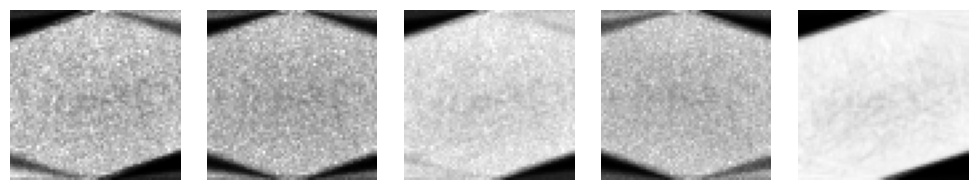

In [34]:
def generate_fake_signatures(vae,num_samples=5):
    with torch.no_grad():
        z=torch.randn(num_samples,2)
        samples=vae.decode(z).view(-1,64,64) 
    return samples

#Generate fake signatures
fake_signatures=generate_fake_signatures(vae,num_samples=5)

#Function to plot images
def plot_images(images,ncols=5):
    n_images=len(images)
    nrows=(n_images+ncols-1)//ncols
    plt.figure(figsize=(ncols*2,nrows*2))
    for i in range(n_images):
        plt.subplot(nrows,ncols,i+1)
        plt.imshow(images[i].cpu(),cmap='gray')
        plt.axis('off') 
    plt.tight_layout()
    plt.show()
    
plot_images(fake_signatures)

 ### Part 2 : GAN to generate fake signatures.

In [ ]:
#Generator Class
class Generator(nn.Module):
    def __init__(self,z_dim):
        super(Generator,self).__init__()
        self.gen=nn.Sequential(
        nn.ConvTranspose2d(z_dim,512,kernel_size=4,stride=1,padding=0),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        nn.ConvTranspose2d(512,256,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        nn.ConvTranspose2d(256,128,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        nn.ConvTranspose2d(128,64,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(True),
        nn.ConvTranspose2d(64,3,kernel_size=4,stride=2,padding=1),
        nn.Tanh()
)

    def forward(self,x):
        return self.gen(x)

In [22]:
#Discriminator Class
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.disc=nn.Sequential(
        nn.Conv2d(3,64,kernel_size=4,stride=2,padding=1),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(64,128,kernel_size=4,stride=2,padding=1), 
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Conv2d(128,256,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Conv2d(256,512,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Conv2d(512,1,kernel_size=4,stride=1,padding=0),
        nn.Sigmoid()
)

    def forward(self,x):
        x=self.disc(x)
        return x.view(-1,1) 

Epoch [1/150] - D Loss: 0.2924, G Loss: 6.6935


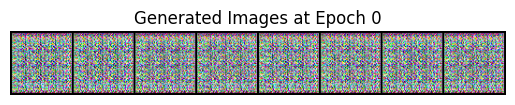

Epoch [2/150] - D Loss: 0.2001, G Loss: 12.3816
Epoch [3/150] - D Loss: 0.4613, G Loss: 14.5221
Epoch [4/150] - D Loss: 0.2850, G Loss: 11.9903
Epoch [5/150] - D Loss: 0.3478, G Loss: 11.9847
Epoch [6/150] - D Loss: 0.3525, G Loss: 8.2423
Epoch [7/150] - D Loss: 0.2398, G Loss: 5.9938
Epoch [8/150] - D Loss: 0.5787, G Loss: 6.9593
Epoch [9/150] - D Loss: 0.1122, G Loss: 5.0183
Epoch [10/150] - D Loss: 0.3499, G Loss: 5.8648
Epoch [11/150] - D Loss: 0.7027, G Loss: 6.8173
Adjusting noise variance to 0.16666666666666669 to prevent mode collapse


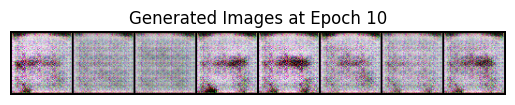

Epoch [12/150] - D Loss: 0.5157, G Loss: 4.1091
Epoch [13/150] - D Loss: 0.5301, G Loss: 3.7165
Epoch [14/150] - D Loss: 0.5619, G Loss: 3.9747
Epoch [15/150] - D Loss: 0.7233, G Loss: 3.4715
Epoch [16/150] - D Loss: 0.5137, G Loss: 3.2221
Epoch [17/150] - D Loss: 0.6733, G Loss: 3.6025
Epoch [18/150] - D Loss: 0.6416, G Loss: 3.8588
Epoch [19/150] - D Loss: 0.5584, G Loss: 3.5454
Epoch [20/150] - D Loss: 0.5867, G Loss: 4.6690
Epoch [21/150] - D Loss: 1.1403, G Loss: 4.2792
Adjusting noise variance to 0.23333333333333334 to prevent mode collapse


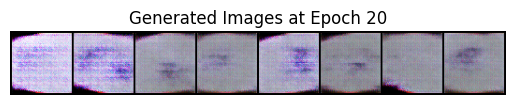

Epoch [22/150] - D Loss: 0.7023, G Loss: 3.7769
Epoch [23/150] - D Loss: 0.5282, G Loss: 3.9986
Epoch [24/150] - D Loss: 0.4342, G Loss: 4.4127
Epoch [25/150] - D Loss: 0.5310, G Loss: 4.9704
Epoch [26/150] - D Loss: 0.3006, G Loss: 4.7115
Epoch [27/150] - D Loss: 0.4195, G Loss: 5.8880
Epoch [28/150] - D Loss: 0.5302, G Loss: 5.5430
Epoch [29/150] - D Loss: 0.2364, G Loss: 5.3767
Epoch [30/150] - D Loss: 0.4320, G Loss: 5.5179
Epoch [31/150] - D Loss: 0.2963, G Loss: 5.7917
Adjusting noise variance to 0.30000000000000004 to prevent mode collapse


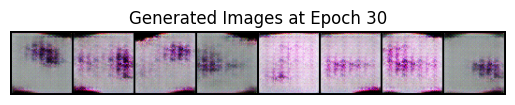

Epoch [32/150] - D Loss: 0.9664, G Loss: 5.0810
Epoch [33/150] - D Loss: 0.3641, G Loss: 4.6296
Epoch [34/150] - D Loss: 0.3345, G Loss: 5.6473
Epoch [35/150] - D Loss: 0.1618, G Loss: 5.1128
Epoch [36/150] - D Loss: 0.1760, G Loss: 6.0262
Epoch [37/150] - D Loss: 0.3262, G Loss: 6.8754
Epoch [38/150] - D Loss: 0.3431, G Loss: 6.6281
Epoch [39/150] - D Loss: 0.2580, G Loss: 6.2899
Epoch [40/150] - D Loss: 0.6033, G Loss: 6.8969
Epoch [41/150] - D Loss: 0.1818, G Loss: 5.8284
Adjusting noise variance to 0.3666666666666667 to prevent mode collapse


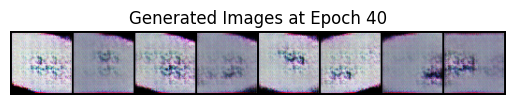

Epoch [42/150] - D Loss: 0.1744, G Loss: 5.8802
Epoch [43/150] - D Loss: 0.1710, G Loss: 6.7434
Epoch [44/150] - D Loss: 0.2172, G Loss: 6.8860
Epoch [45/150] - D Loss: 0.1996, G Loss: 6.1819
Epoch [46/150] - D Loss: 0.2184, G Loss: 6.9422
Epoch [47/150] - D Loss: 0.3745, G Loss: 6.2431
Epoch [48/150] - D Loss: 0.1521, G Loss: 6.4847
Epoch [49/150] - D Loss: 0.2850, G Loss: 6.5329
Epoch [50/150] - D Loss: 0.2163, G Loss: 5.7351
Epoch [51/150] - D Loss: 0.7398, G Loss: 6.1427
Adjusting noise variance to 0.43333333333333335 to prevent mode collapse


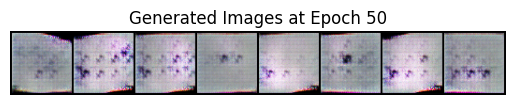

Epoch [52/150] - D Loss: 0.2325, G Loss: 5.8845
Epoch [53/150] - D Loss: 0.3959, G Loss: 5.0821
Epoch [54/150] - D Loss: 0.5315, G Loss: 6.3306
Epoch [55/150] - D Loss: 0.3677, G Loss: 5.2725
Epoch [56/150] - D Loss: 0.8380, G Loss: 5.4804
Epoch [57/150] - D Loss: 0.5484, G Loss: 5.9970
Epoch [58/150] - D Loss: 0.4207, G Loss: 5.8022
Epoch [59/150] - D Loss: 0.2199, G Loss: 5.0737
Epoch [60/150] - D Loss: 0.2177, G Loss: 4.7700
Epoch [61/150] - D Loss: 0.4556, G Loss: 5.4984
Adjusting noise variance to 0.5 to prevent mode collapse


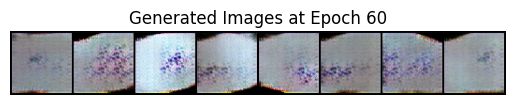

Epoch [62/150] - D Loss: 0.7829, G Loss: 5.3867
Epoch [63/150] - D Loss: 0.3327, G Loss: 4.5386
Epoch [64/150] - D Loss: 0.4987, G Loss: 6.0199
Epoch [65/150] - D Loss: 0.2036, G Loss: 4.8906
Epoch [66/150] - D Loss: 0.3379, G Loss: 5.0229
Epoch [67/150] - D Loss: 0.8911, G Loss: 5.5651
Epoch [68/150] - D Loss: 0.3114, G Loss: 4.2086
Epoch [69/150] - D Loss: 0.2647, G Loss: 4.5805
Epoch [70/150] - D Loss: 0.4411, G Loss: 4.9581
Epoch [71/150] - D Loss: 0.4211, G Loss: 5.7209
Adjusting noise variance to 0.5666666666666667 to prevent mode collapse


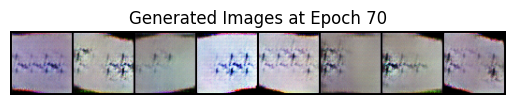

Epoch [72/150] - D Loss: 0.2468, G Loss: 4.0611
Epoch [73/150] - D Loss: 0.5906, G Loss: 4.7516
Epoch [74/150] - D Loss: 0.6706, G Loss: 4.8962
Epoch [75/150] - D Loss: 0.3242, G Loss: 4.3872
Epoch [76/150] - D Loss: 1.2517, G Loss: 4.5449
Epoch [77/150] - D Loss: 0.3166, G Loss: 4.7995
Epoch [78/150] - D Loss: 0.2904, G Loss: 4.5229
Epoch [79/150] - D Loss: 0.5026, G Loss: 5.4640
Epoch [80/150] - D Loss: 0.2296, G Loss: 4.3790
Epoch [81/150] - D Loss: 0.2029, G Loss: 4.5241
Adjusting noise variance to 0.6333333333333333 to prevent mode collapse


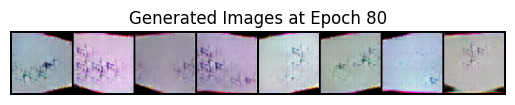

Epoch [82/150] - D Loss: 0.1631, G Loss: 5.0451
Epoch [83/150] - D Loss: 0.1416, G Loss: 4.9623
Epoch [84/150] - D Loss: 0.1758, G Loss: 5.3936
Epoch [85/150] - D Loss: 0.2079, G Loss: 5.8797
Epoch [86/150] - D Loss: 0.1778, G Loss: 5.5033
Epoch [87/150] - D Loss: 0.1683, G Loss: 5.3626
Epoch [88/150] - D Loss: 0.8973, G Loss: 5.7668
Epoch [89/150] - D Loss: 0.5644, G Loss: 5.7696
Epoch [90/150] - D Loss: 0.2665, G Loss: 4.9116
Epoch [91/150] - D Loss: 0.2440, G Loss: 5.1812
Adjusting noise variance to 0.7 to prevent mode collapse


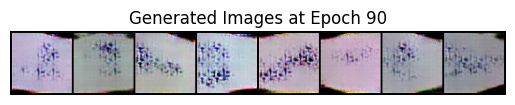

Epoch [92/150] - D Loss: 0.1554, G Loss: 5.2683
Epoch [93/150] - D Loss: 0.2096, G Loss: 4.5881
Epoch [94/150] - D Loss: 1.0780, G Loss: 6.1672
Epoch [95/150] - D Loss: 0.4917, G Loss: 5.7016
Epoch [96/150] - D Loss: 0.1532, G Loss: 4.7942
Epoch [97/150] - D Loss: 0.2273, G Loss: 4.8234
Epoch [98/150] - D Loss: 0.5815, G Loss: 6.1365
Epoch [99/150] - D Loss: 0.5831, G Loss: 5.7430
Epoch [100/150] - D Loss: 0.1480, G Loss: 5.0455
Epoch [101/150] - D Loss: 0.1658, G Loss: 5.3311
Adjusting noise variance to 0.7666666666666666 to prevent mode collapse


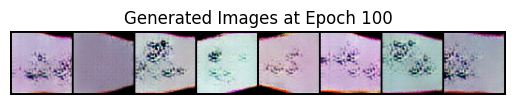

Epoch [102/150] - D Loss: 0.2151, G Loss: 4.9134
Epoch [103/150] - D Loss: 0.8012, G Loss: 4.9156
Epoch [104/150] - D Loss: 0.2983, G Loss: 5.1686
Epoch [105/150] - D Loss: 0.3210, G Loss: 6.4624
Epoch [106/150] - D Loss: 0.1332, G Loss: 5.2650
Epoch [107/150] - D Loss: 0.1537, G Loss: 5.7449
Epoch [108/150] - D Loss: 0.1068, G Loss: 5.2076
Epoch [109/150] - D Loss: 0.2449, G Loss: 5.8790
Epoch [110/150] - D Loss: 0.5498, G Loss: 6.4399
Epoch [111/150] - D Loss: 0.6888, G Loss: 6.0227
Adjusting noise variance to 0.8333333333333333 to prevent mode collapse


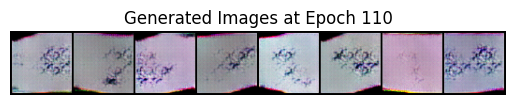

Epoch [112/150] - D Loss: 0.1397, G Loss: 4.6194
Epoch [113/150] - D Loss: 0.1120, G Loss: 5.4523
Epoch [114/150] - D Loss: 0.1065, G Loss: 4.6828
Epoch [115/150] - D Loss: 0.7034, G Loss: 5.3629
Epoch [116/150] - D Loss: 0.1288, G Loss: 4.9536
Epoch [117/150] - D Loss: 0.1775, G Loss: 4.8816
Epoch [118/150] - D Loss: 0.9799, G Loss: 4.9289
Epoch [119/150] - D Loss: 0.7762, G Loss: 4.8552
Epoch [120/150] - D Loss: 0.3147, G Loss: 5.5108
Epoch [121/150] - D Loss: 0.3266, G Loss: 5.4940
Adjusting noise variance to 0.9 to prevent mode collapse


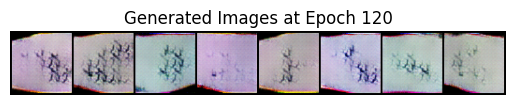

Epoch [122/150] - D Loss: 0.9616, G Loss: 4.5204
Epoch [123/150] - D Loss: 0.6421, G Loss: 4.8041
Epoch [124/150] - D Loss: 0.2992, G Loss: 5.4300
Epoch [125/150] - D Loss: 0.2075, G Loss: 4.1925
Epoch [126/150] - D Loss: 0.1725, G Loss: 4.5706
Epoch [127/150] - D Loss: 0.1503, G Loss: 4.7353
Epoch [128/150] - D Loss: 0.1387, G Loss: 5.0167
Epoch [129/150] - D Loss: 0.0966, G Loss: 4.9288
Epoch [130/150] - D Loss: 0.0724, G Loss: 5.1353
Epoch [131/150] - D Loss: 0.0952, G Loss: 5.2802
Adjusting noise variance to 0.9666666666666667 to prevent mode collapse


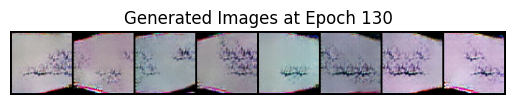

Epoch [132/150] - D Loss: 0.2148, G Loss: 5.3685
Epoch [133/150] - D Loss: 0.8984, G Loss: 5.8678
Epoch [134/150] - D Loss: 0.1900, G Loss: 5.4352
Epoch [135/150] - D Loss: 0.1077, G Loss: 5.3014
Epoch [136/150] - D Loss: 0.1094, G Loss: 4.9317
Epoch [137/150] - D Loss: 0.1211, G Loss: 4.6628
Epoch [138/150] - D Loss: 0.7809, G Loss: 6.9172
Epoch [139/150] - D Loss: 0.4933, G Loss: 6.9928
Epoch [140/150] - D Loss: 0.1742, G Loss: 5.0692
Epoch [141/150] - D Loss: 0.3111, G Loss: 6.4273
Adjusting noise variance to 1.0333333333333334 to prevent mode collapse


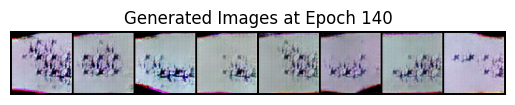

Epoch [142/150] - D Loss: 0.3589, G Loss: 6.5904
Epoch [143/150] - D Loss: 0.1425, G Loss: 4.6230
Epoch [144/150] - D Loss: 0.5409, G Loss: 6.4125
Epoch [145/150] - D Loss: 0.2911, G Loss: 6.2873
Epoch [146/150] - D Loss: 0.2824, G Loss: 5.8031
Epoch [147/150] - D Loss: 0.7233, G Loss: 5.4976
Epoch [148/150] - D Loss: 0.4418, G Loss: 6.4723
Epoch [149/150] - D Loss: 0.1453, G Loss: 4.8678
Epoch [150/150] - D Loss: 0.1222, G Loss: 4.6292


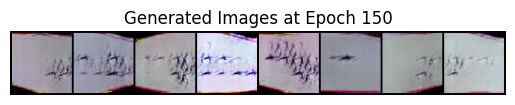

In [21]:
#Training Loop
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#Hyperparameters
z_dim=100
batch_size=64
num_epochs=150
patience=10
#Load dataset
directory=r"C:\Users\HP\Downloads\outputQ1"

#Initialize GAN models and optimizers
generator=Generator(z_dim=z_dim).to(device)
discriminator=Discriminator().to(device)
gen_optimizer=optim.Adam(generator.parameters(),lr=0.0002,betas=(0.5,0.999))
disc_optimizer=optim.Adam(discriminator.parameters(),lr=0.0002,betas=(0.5,0.999))
criterion=nn.BCELoss()
min_loss=np.inf
early_stop_counter=0


#Training loop
for epoch in (range(num_epochs)):
    epoch_d_loss=0
    epoch_g_loss=0
    for real_images in dataloader:
        real_images=real_images.to(device)
        batch_size=real_images.size(0)

        #Train Discriminator
        disc_optimizer.zero_grad()
        real_labels=torch.ones(batch_size,1,device=device)
        fake_labels=torch.zeros(batch_size,1,device=device)
        real_outputs=discriminator(real_images)
        d_loss_real=criterion(real_outputs,real_labels)
        noise=torch.randn(batch_size,z_dim,1,1,device=device)
        fake_images=generator(noise)
        fake_outputs=discriminator(fake_images.detach())
        d_loss_fake=criterion(fake_outputs,fake_labels)
        d_loss=d_loss_real+d_loss_fake
        d_loss.backward()
        disc_optimizer.step()
        epoch_d_loss+=d_loss.item()

        #Train Generator
        gen_optimizer.zero_grad()
        fake_outputs=discriminator(fake_images)
        g_loss=criterion(fake_outputs,real_labels)
        g_loss.backward()
        gen_optimizer.step()
        epoch_g_loss+=g_loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}] - D Loss: {epoch_d_loss/len(dataloader):.4f}, G Loss: {epoch_g_loss/len(dataloader):.4f}")

  
    if epoch % 10==0 and epoch > 0:
        noise=torch.randn(batch_size,z_dim,1,1,device=device) * (0.1+(epoch/num_epochs))
        print(f"Adjusting noise variance to {0.1+(epoch/num_epochs)} to prevent mode collapse")

    #Validate images
    if epoch % 10 == 0:
        noise=torch.randn(8,z_dim,1,1,device=device)
        generated_images=generator(noise).detach().cpu()
        grid=np.transpose(vutils.make_grid(generated_images,padding=2,normalize=True),(1,2,0))
        plt.imshow(grid)
        plt.title(f"Generated Images at Epoch {epoch}")
        plt.axis('off')
        plt.show()

noise=torch.randn(8,z_dim,1,1,device=device)
generated_images=generator(noise).detach().cpu()
grid=np.transpose(vutils.make_grid(generated_images,padding=2,normalize=True),(1,2,0))
plt.imshow(grid)
plt.title(f"Generated Images at Epoch {epoch}")
plt.axis('off')
plt.show()

#Save Models
torch.save(generator.state_dict(),'C:/Users/HP/Downloads/outputQ1/netG.pth')
torch.save(discriminator.state_dict(),'C:/Users/HP/Downloads/outputQ1/netD.pth')

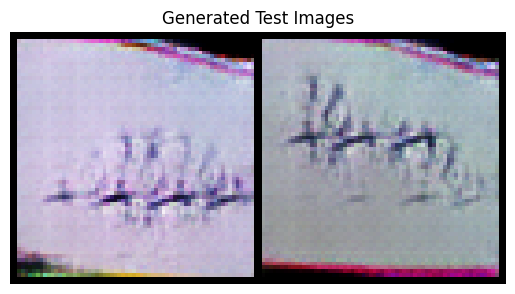

In [23]:
#Generate images after model training
generator.eval()
#Generate random noise
noise=torch.randn(2,z_dim,1,1,device=device)
#Generate images using the trained generator
with torch.no_grad(): 
    generated_images=generator(noise).detach().cpu()

#Display generated images
grid=np.transpose(vutils.make_grid(generated_images,padding=2,normalize=True),(1,2,0))
plt.imshow(grid)
plt.title(f"Generated Test Images")
plt.axis('off') 
plt.show()